<a href="https://colab.research.google.com/github/ilhammutashim/Mu/blob/main/Code_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load both datasets
df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")

# Display basic info and head of both datasets
df_mat_info = df_mat.info()
df_mat_head = df_mat.head()

df_por_info = df_por.info()
df_por_head = df_por.head()

df_mat_info, df_mat_head, df_por_info, df_por_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

(None,
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
 None,
   school sex  age address famsize Pstatus  Medu  Fedu    

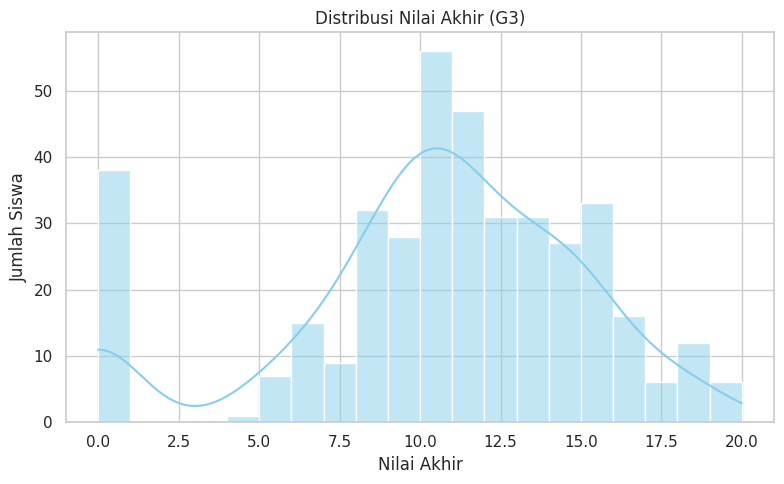

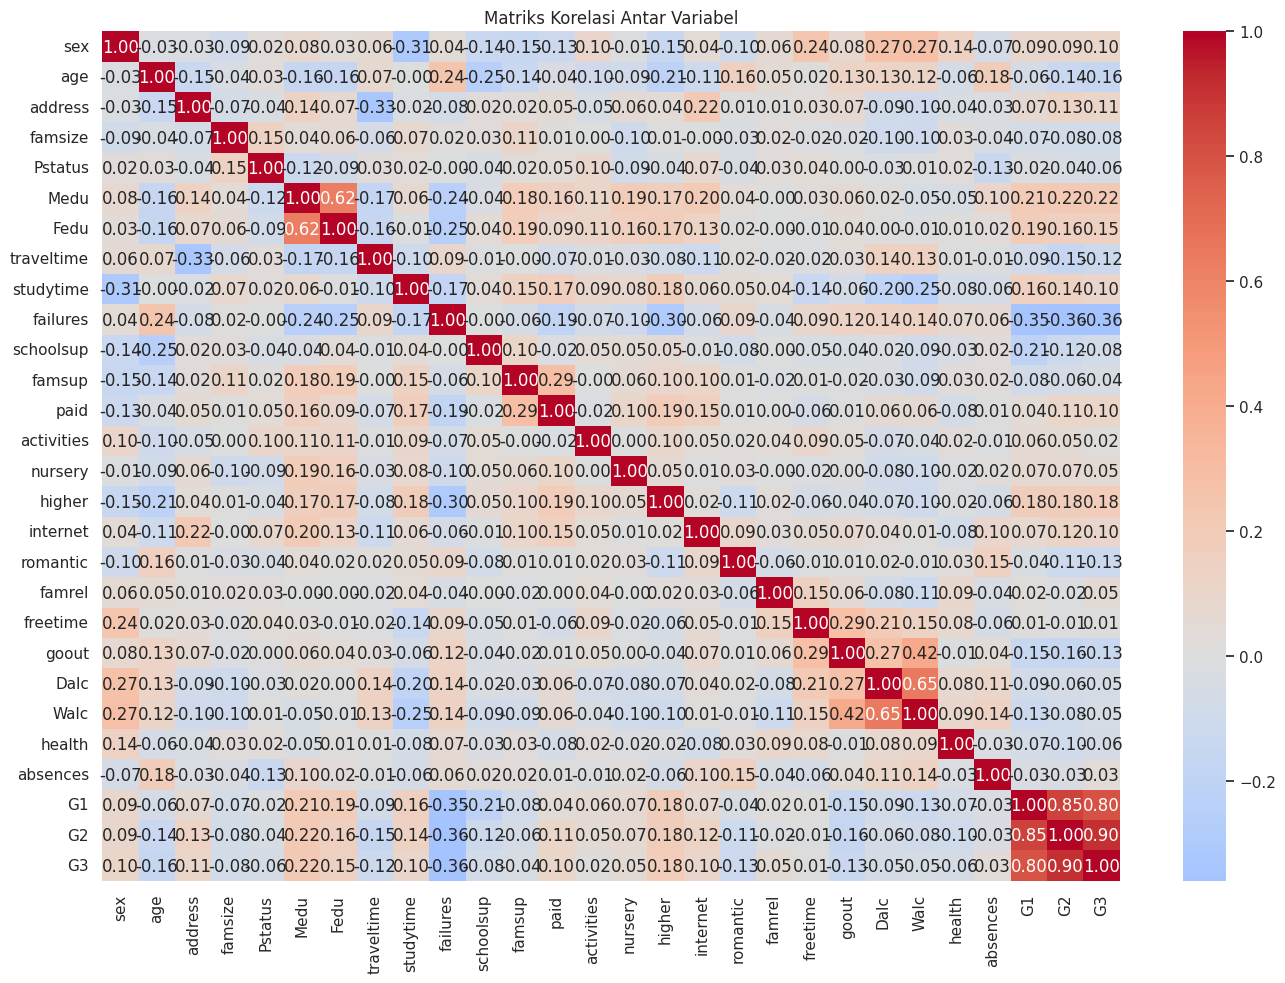

/tmp/ipython-input-3-4191912023.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='studytime', y='G3', palette='Blues_d')


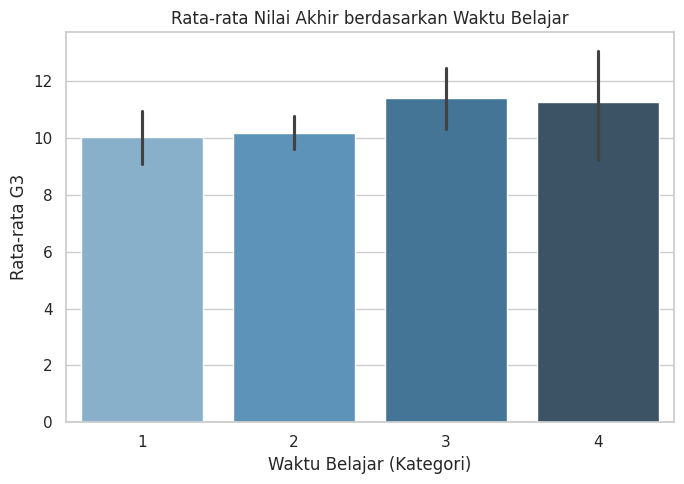

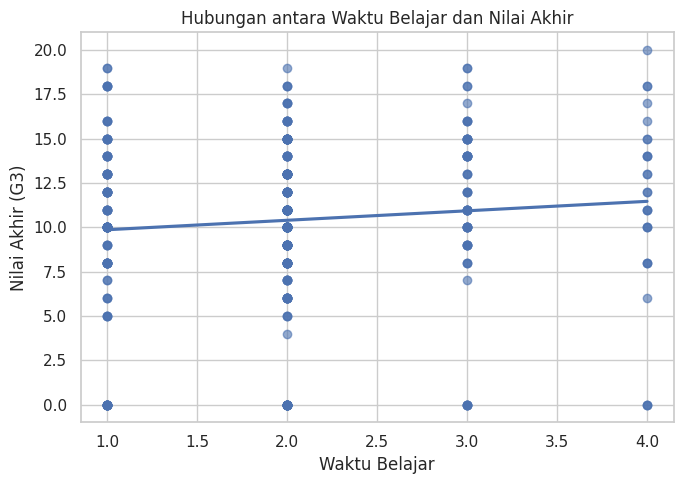

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
higher,0.182465
Fedu,0.152457
address,0.105756
sex,0.103456
paid,0.101996
internet,0.098483


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set(style="whitegrid")

# Data used for analysis
df = df_mat.copy()

# Convert binary categorical columns to 0/1
binary_map = {"yes": 1, "no": 0, "F": 0, "M": 1, "U": 1, "R": 0, "LE3": 0, "GT3": 1, "T": 1, "A": 0}
binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
               'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# 1. Visualisasi distribusi nilai akhir
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], kde=True, bins=20, color='skyblue')
plt.title("Distribusi Nilai Akhir (G3)")
plt.xlabel("Nilai Akhir")
plt.ylabel("Jumlah Siswa")
plt.tight_layout()
plt.show()

# 2. Korelasi antar variabel numerik
plt.figure(figsize=(14, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriks Korelasi Antar Variabel")
plt.tight_layout()
plt.show()

# 3. Rata-rata G3 berdasarkan studytime
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='studytime', y='G3', palette='Blues_d')
plt.title("Rata-rata Nilai Akhir berdasarkan Waktu Belajar")
plt.xlabel("Waktu Belajar (Kategori)")
plt.ylabel("Rata-rata G3")
plt.tight_layout()
plt.show()

# 4. Scatterplot untuk regresi (contoh: studytime vs G3)
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='studytime', y='G3', ci=None, scatter_kws={'alpha':0.6})
plt.title("Hubungan antara Waktu Belajar dan Nilai Akhir")
plt.xlabel("Waktu Belajar")
plt.ylabel("Nilai Akhir (G3)")
plt.tight_layout()
plt.show()

# Siap lanjutkan regresi dan analisis selanjutnya
df.corr(numeric_only=True)['G3'].sort_values(ascending=False)


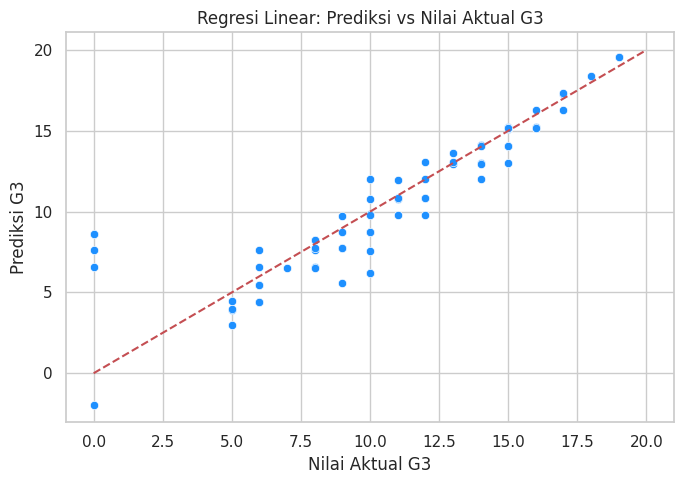

(array([ 1.07889282, -0.48972595, -0.04257423]),
 np.float64(-0.9148631321039442),
 4.563459878933149,
 0.777446995401949)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Variabel untuk regresi
X = df[['G2', 'failures', 'studytime']]
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisasi hasil regresi prediksi vs aktual
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue')
plt.plot([0, 20], [0, 20], 'r--')  # garis ideal
plt.title("Regresi Linear: Prediksi vs Nilai Aktual G3")
plt.xlabel("Nilai Aktual G3")
plt.ylabel("Prediksi G3")
plt.tight_layout()
plt.show()

model.coef_, model.intercept_, mse, r2


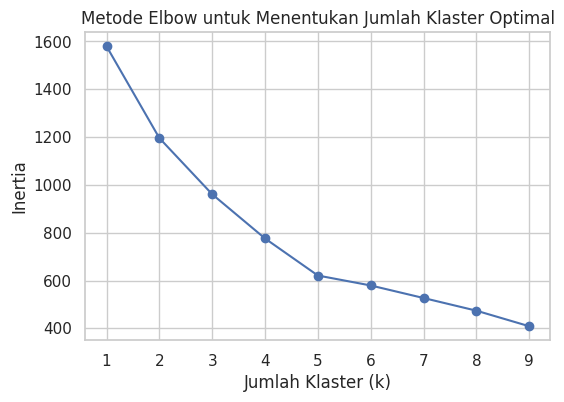

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur untuk clustering
features = df[['studytime', 'G2', 'failures', 'absences']]

# Standardisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Tentukan jumlah klaster optimal (pakai elbow method)
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()


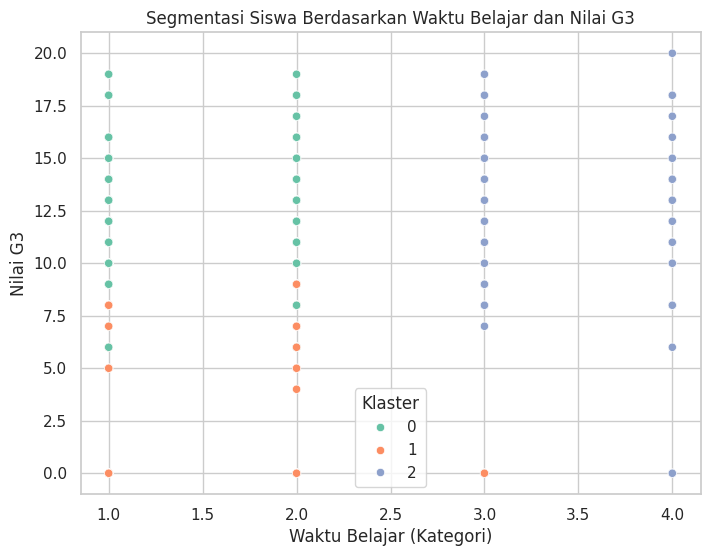

In [23]:
# Gunakan KMeans dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi klaster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='studytime', y='G3', hue='Cluster', palette='Set2')
plt.title('Segmentasi Siswa Berdasarkan Waktu Belajar dan Nilai G3')
plt.xlabel('Waktu Belajar (Kategori)')
plt.ylabel('Nilai G3')
plt.legend(title='Klaster')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Binerisasi target G3
df['G3_binary'] = df['G3'].apply(lambda x: 1 if x > 10 else 0)

# Fitur dan target
X = df[['G2', 'failures', 'absences']]
y = df['G3_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model klasifikasi
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.94      0.89      0.92        56

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119



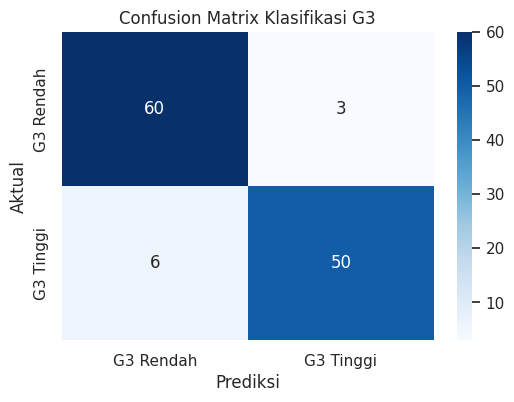

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["G3 Rendah", "G3 Tinggi"], yticklabels=["G3 Rendah", "G3 Tinggi"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Klasifikasi G3")
plt.show()


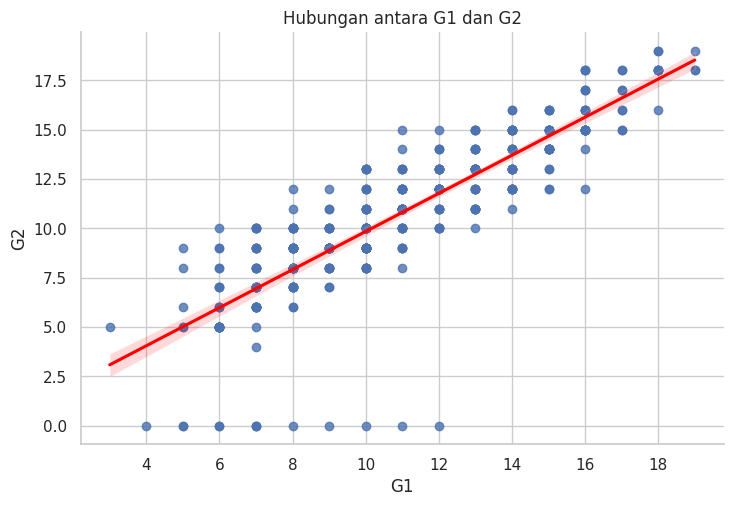

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='G1', y='G2', data=df, aspect=1.5, line_kws={'color': 'red'})
plt.title("Hubungan antara G1 dan G2")
plt.show()


In [15]:
import pandas as pd

# Load data
df = pd.read_csv('student-mat.csv')

# Cek daftar nama kolom
print(df.columns)


Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')
